In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow import keras

In [3]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

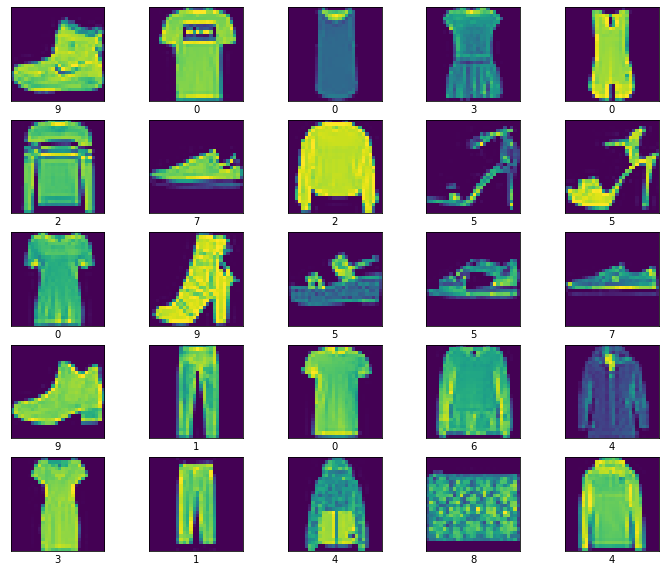

In [5]:
plt.figure(figsize=(12,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[i])

In [6]:
# model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=128,activation='relu'))
# model.add(Dense(units=10,activation='sigmoid'))
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0 

In [9]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4976 - accuracy: 0.8270
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3753 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3140 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2941 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2825 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2698 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2594 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2508 - accuracy: 0.9065
Epoch 10/10

In [10]:
pred=model.predict(test_images)

In [17]:
print('predicted=',np.argmax(pred[1]))
print('actual=',test_labels[1])

predicted= 2
actual= 2


In [23]:
for i in range(20):
#   print('predicted=',np.argmax(pred[i]))
#   print('actual=',test_labels[i])
  print(f"actual={test_labels[i]}, predicted={np.argmax(pred[i])}")
  print("\n")

actual=9, predicted=9


actual=2, predicted=2


actual=1, predicted=1


actual=1, predicted=1


actual=6, predicted=6


actual=1, predicted=1


actual=4, predicted=4


actual=6, predicted=6


actual=5, predicted=5


actual=7, predicted=7


actual=4, predicted=4


actual=5, predicted=5


actual=7, predicted=7


actual=3, predicted=3


actual=4, predicted=4


actual=1, predicted=1


actual=2, predicted=2


actual=4, predicted=2


actual=8, predicted=8


actual=0, predicted=0




#2nd method or way like mnist

In [1]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images=train_images.reshape(60000,784)
test_images=test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [5]:
classifier=Sequential()
classifier.add(Dense(512,input_shape=(784,)))
classifier.add(Activation('relu') )
classifier.add(Dropout(0.2))
classifier.add(Dense(512))
classifier.add(Activation('relu') )
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [7]:
classifier.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

In [8]:
from keras.utils import to_categorical
n_classes = 10
train_labels = to_categorical(train_labels, n_classes)
test_labels = to_categorical(test_labels, n_classes)

In [10]:
classifier.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.5079 - accuracy: 0.8149 - val_loss: 0.4539 - val_accuracy: 0.8316
Epoch 2/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.3957 - accuracy: 0.8556 - val_loss: 0.4071 - val_accuracy: 0.8491
Epoch 3/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.3615 - accuracy: 0.8674 - val_loss: 0.3566 - val_accuracy: 0.8679
Epoch 4/10
60000/60000 [==============================] - 31s 525us/step - loss: 0.3414 - accuracy: 0.8738 - val_loss: 0.3570 - val_accuracy: 0.8724
Epoch 5/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.3292 - accuracy: 0.8785 - val_loss: 0.3450 - val_accuracy: 0.8748
Epoch 6/10
60000/60000 [==============================] - 31s 510us/step - loss: 0.3143 - accuracy: 0.8831 - val_loss: 0.3441 - val_accuracy: 0.8724
Epoch 7/10
60000/60000 [==============================] 

In [14]:
pred=classifier.predict(test_images)
for i in range(20):
#   print('predicted=',np.argmax(pred[i]))
#   print('actual=',test_labels[i])
  print(f"actual={np.argmax(test_labels[i])}, predicted={np.argmax(pred[i])}")
  print("\n")

actual=9, predicted=9


actual=2, predicted=2


actual=1, predicted=1


actual=1, predicted=1


actual=6, predicted=6


actual=1, predicted=1


actual=4, predicted=4


actual=6, predicted=6


actual=5, predicted=5


actual=7, predicted=7


actual=4, predicted=4


actual=5, predicted=5


actual=7, predicted=5


actual=3, predicted=3


actual=4, predicted=2


actual=1, predicted=1


actual=2, predicted=2


actual=4, predicted=2


actual=8, predicted=8


actual=0, predicted=0


